# MSDS 430 Final Project

#### Complete the following and submit your notebook, html to Canvas. Your completed notebook should include all output, i.e. run each cell and save your file before submitting.

<font color=blue> In this final project you will continue working with the building prices dataset. You have already run Python code to fix the bad data detected in Milestone 1. 

In Milestone 2 you selected a sngle variable that you think is best for predicting sale price.  Use your single variable from Milestone 2 to complete this assignment.  You can change your mind but tell me what you are doing and why.</font>

The code provided below uses age_home for the input variable. This is just so the code will run.  Replace age_home with the name of the variable you selected in Milestone 2.   

Based on Milestone 2, it was determined that the variable taxes be used to predict price. The adjusted dataframe with duplicates removed, and with missing and erroneous values set to the median, showed that taxes had the highest correlation to price at 0.878568. Therefore, in the following, taxes will be the input variable.

# Section 1 Import and Explore
Start by rebuilding the dataframes you used in Milestone 1 and 2.

In [1]:
!pip install pandas==0.23.4
import pandas as pd 
import numpy as np   
import matplotlib.pyplot as plt   
import statsmodels.formula.api as smf
import seaborn as sns
sns.set(style="ticks", palette="bright")


In [2]:
from google.colab import files
import os
files.upload()

Saving building prices 2018-1.csv to building prices 2018-1.csv


{'building prices 2018-1.csv': b'price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces\r\n25.9,4.918,1,3.472,0.998,1,7,4,42,0\r\n29.5,5.021,1,3.531,1.5,2,7,4,62,0\r\n27.9,4.543,1,2.275,1.175,1,6,3,40,0\r\n25.9,4.557,1,4.05,1.232,1,6,3,54,0\r\n29.9,5.06,1,0,1.121,1,6,3,0,0\r\n29.9,0,1,4.455,0.988,1,6,3,56,0\r\n30.9,5.898,1,5.85,1.24,1,7,3,51,1\r\n28.9,5.604,1,9.52,1.501,0,6,3,32,0\r\n35.9,5.828,1,6.435,1.225,2,6,3,32,0\r\n31.5,5.3,1,4.988,1.552,1,6,3,30,0\r\n31,6.271,1,5.52,0.975,1,5,2,30,0\r\n30.9,5.959,1,6.666,1.121,2,6,3,32,0\r\n30,5.05,1,5,1.02,0,5,2,46,1\r\n36.9,8.246,1.5,5.15,1.664,2,8,4,50,0\r\n41.9,6.697,1.5,6.902,1.488,1.5,7,3,22,1\r\n40.5,7.784,1.5,7.102,1.376,1,6,3,17,0\r\n30.9,5.959,1,6.666,1.121,2,6,3,32,0\r\n30,5.05,1,5,1.02,0,5,2,46,1\r\n36.9,8.246,1.5,5.15,1.664,2,8,4,50,0\r\n41.9,6.697,1.5,6.902,1.488,1.5,7,3,22,1\r\n40.5,7.784,1.5,7.102,1.376,1,6,3,17,0\r\n43.9,9.038,1,7.8,1.5,1.5,7,3,23,0\r\n37.9,0,1,5.52,9999,2,6,3,9999,1\r\

In [3]:
df = pd.read_csv('building prices 2018-1.csv')
df.columns = [s.lower() for s in df.columns]
df.head()

,price,taxes,bathrooms,lot_size,living_space,num_garage,num_rooms,num_bedrms,age_home,num_fplaces
0,25.9,4.918,1.0,3.472,0.998,1.0,7,4,42,0
1,29.5,5.021,1.0,3.531,1.500,2.0,7,4,62,0
2,27.9,4.543,1.0,2.275,1.175,1.0,6,3,40,0
3,25.9,4.557,1.0,4.050,1.232,1.0,6,3,54,0
4,29.9,5.060,1.0,0.000,1.121,1.0,6,3,0,0


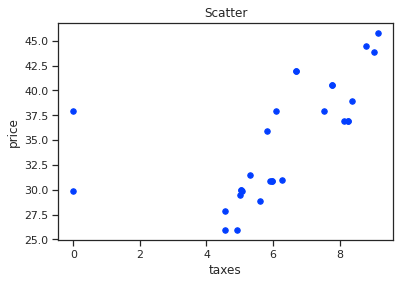

In [4]:
def scat(dataframe,var1,var2):     
    plt.scatter(dataframe[var1],dataframe[var2], s = 30)     
    plt.title('Scatter')     
    plt.xlabel(var1)
    plt.ylabel(var2)
          
scat(df, 'taxes', 'price')

# Section 2 Base Model and RMSE  

Run a base model and calculate the root mean square error for the model.  Kaggle is set up to score your models using RMSE and my score code also uses RMSE.  However, I have penalty's for out of range predictions and missing predictions so make sure none of these will apply to your model predictions.

Using the statsmodels API for this linear model and age_home for the single prediction variable.  age_home will be used for the single prediction variable for each of the sections where the change will be improvement in the data due to the EDA.  Result will be model RMSE improvement due to the EDA rather than changes to the input variable.

In [5]:
base_model = smf.ols(formula='price ~ taxes', data=df).fit()
base_model.summary()
predictions = base_model.fittedvalues
predictions.head()

0    33.003663
1    33.163371
2    32.422201
3    32.443909
4    33.223843
dtype: float64

Join the model predictions data with actual price to calculate BASE_RMSE.

In [6]:
d = {'p_price': predictions}
d1=pd.DataFrame(data=d)
join = pd.concat([df,d1],axis = 1, join_axes=[df.index])
join['sq_error'] = (join['price'] - join['p_price'])**2 
mean_sq_error =  np.sqrt(join.sq_error).mean()
BASE_RMSE = np.around([mean_sq_error], decimals=2)
BASE_RMSE

array([3.97])

Look at a scatter plot of price vs p_price to see if this model looks reasonable.

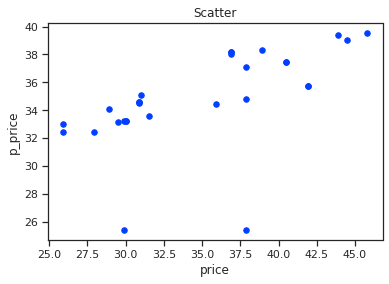

In [7]:
scat(join, 'price', 'p_price')

# Section 3 RMSE (after removing duplicate records)

In [8]:
df1 = df.drop_duplicates(keep='first')
print('Number of Records:', len(df1))

Number of Records: 24


Model the data with the nodups dataset df1:

In [9]:
nodups_model = smf.ols(formula='price ~ age_home', data=df1).fit()
nodups_model.summary()
nodups_preds = nodups_model.fittedvalues
nodups_preds.head()

0    34.493316
1    34.499997
2    34.492648
3    34.497324
4    34.479285
dtype: float64

Calculate the NODUPS_RMSE:

In [10]:
d = {'p_price': nodups_preds}
d2=pd.DataFrame(data=d)
join = pd.concat([df,d2],axis = 1, join_axes=[df.index])
join['sq_error'] = (join['price'] - join['p_price'])**2 
mean_sq_error =  np.sqrt(join.sq_error).mean()
NODUPS_RMSE = np.around([mean_sq_error], decimals=2)
NODUPS_RMSE

array([5.14])

# Section 4 RMSE Score (after EDA fixing outliers and missing data)

In [0]:
df2 = df1.copy()
df2=df2.replace({'living_space': {9999: 0}})
df2=df2.replace({'age_home': {9999: 0}})
m = np.median(df2.taxes[df2.taxes>0])
df2=df2.replace({'taxes': {0: m}})
n = np.median(df2.lot_size[df2.lot_size>0])
df2=df2.replace({'lot_size': {0: n}})
p = np.median(df2.living_space[df2.living_space>0])
df2=df2.replace({'living_space': {0: p}})
q = np.median(df2.age_home[df2.age_home>0])
df2=df2.replace({'age_home': {0: q}})

Use df2 with outlier and missing data fixes in place.

In [12]:
age_home_model = smf.ols(formula='price ~ age_home', data=df2).fit()
age_home_model.summary()
age_home_preds = age_home_model.fittedvalues
age_home_preds.head()

0    33.529572
1    29.838623
2    33.898667
3    31.315003
4    35.375046
dtype: float64

Calculate age_home_RMSE for the nodups, no outliers and no missing values data df2.

In [13]:
d = {'p_price': age_home_preds}
d2=pd.DataFrame(data=d)
join = pd.concat([df,d2],axis = 1, join_axes=[df.index])
join['sq_error'] = (join['price'] - join['p_price'])**2 
mean_sq_error =  np.sqrt(join.sq_error).mean()
age_home_RMSE = np.around([mean_sq_error], decimals=2)
age_home_RMSE

array([4.45])

# In your Python career you will see instances where others have offered a predictive model without doing any EDA and no data fixes.  You know how to fix this.  Be kind in sharing your skill.

# OK  Summarize the RMSE for each of the models.

In [14]:
models_df = ({'Base Model':BASE_RMSE,
                      'nodups Model':NODUPS_RMSE,
                      'age_home Model':age_home_RMSE})
models = pd.Series(models_df)                
models

Base Model        [3.97]
nodups Model      [5.14]
age_home Model    [4.45]
dtype: object

# Bonus Points
# Submit your model to Kaggle.com for scoring.  Use the code below to create the csv file for Kaggle.  You may have to add the column variable names to the csv file to submit to kaggle.

In [0]:
#df.to_csv('predictions.csv')
df.to_csv('submission.csv' , index=False)

# Everything below is optional
age_home model with removal of duplicate records and fixes for outliers and missing data show major improvement for the simple single variable model.  Still more you can do by including other variables.  

One more look at a pairplot for price vs p_price with the single variable model:

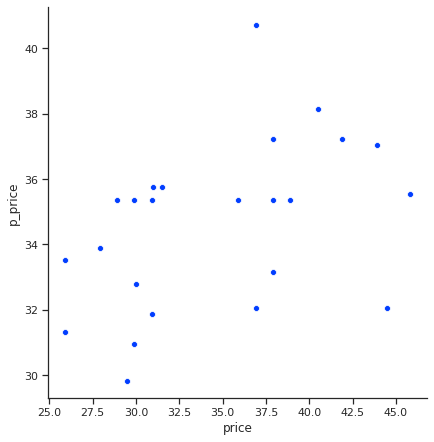

In [16]:
sns.set(style="ticks", palette="bright")
sns.pairplot(x_vars=["price"], y_vars=["p_price"], data=join, height = 6)

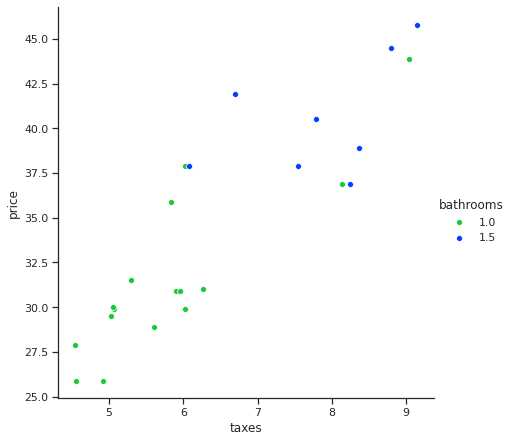

In [17]:
#Pairplot for price vs. taxes by bathrooms
import seaborn as sns
sns.set(style="ticks", palette="bright")
sns.pairplot(x_vars=["taxes"], y_vars=["price"], data=df2, hue="bathrooms",  
             palette=["g", "b","y","r"],height = 6)

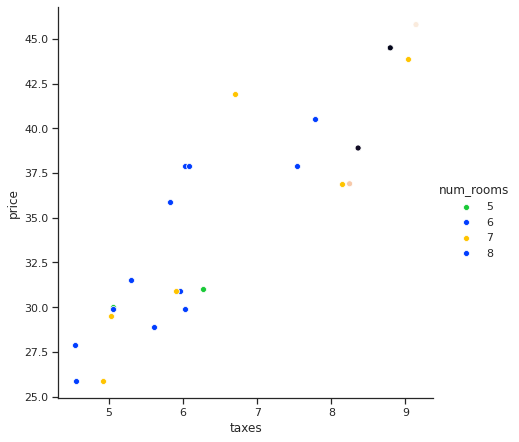

In [18]:
#Pairplot for price vs. taxes by num_rooms
import seaborn as sns
sns.set(style="ticks", palette="bright")
sns.pairplot(x_vars=["taxes"], y_vars=["price"], data=df2, hue="num_rooms",  
             palette=["g","b","y","r"],height = 6)

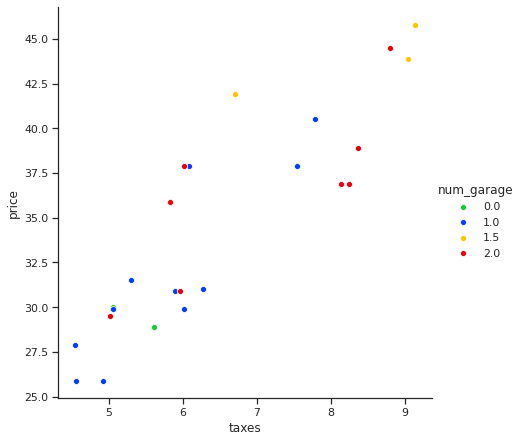

In [19]:
#Pairplot for price vs. taxes by num_garage
import seaborn as sns
sns.set(style="ticks", palette="bright")
sns.pairplot(x_vars=["taxes"], y_vars=["price"], data=df2, hue="num_garage",  
             palette=["g","b","y","r"],height = 6)


Bathrooms may be a good addition to the model.  Maybe something else too.  You decide.

Three pair plots of taxes versus price by another variable are included above by bathrooms, by num_rooms, and by num_garage. Each plot shows that these additional variables have interesting relationships between tax and price. Num_garage seems to show 1.5 and 2.0 garages have higher taxes and prices than 0 and 1 garages. Num_rooms also seems to show that a good amount of houses with 7 and 8 rooms have higher taxes and prices than 5 and 6 rooms. However, there is quite a bit of variation. The most discernable relationship found is with bathrooms. It is clear that houses with 1.5 bathrooms have higher taxes and prices than those with 1 bathroom. To better determine this, further analysis would be required.